<a href="https://colab.research.google.com/github/ranaosamaahmed37-cloud/AI_ITI_Project/blob/main/project_iti_t8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#start project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
train_url = "https://raw.githubusercontent.com/verenaashraf/AI_ITI_Project/refs/heads/main/house-prices-advanced-regression-techniques%20(1)/train.csv"
test_url = "https://raw.githubusercontent.com/verenaashraf/AI_ITI_Project/refs/heads/main/house-prices-advanced-regression-techniques%20(1)/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)


In [ ]:
display(train_df.head())
#عرض اول 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
display(train_df.tail())
#عرض اخر 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:

print(f"Train shape: {train_df.shape}")
print(f"Test shape : {train_df.shape}")

Train shape: (1460, 81)
Test shape : (1460, 81)


In [ ]:

numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

In [ ]:
cat_fill_none = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in cat_fill_none:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

num_fill_zero = ["GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "MasVnrArea"]
for col in num_fill_zero:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

In [ ]:

imputer = KNNImputer(n_neighbors=5)
for df in [train_df, test_df]:
    df["LotFrontage"] = imputer.fit_transform(df[["LotFrontage"]])

In [ ]:

for col in cat_cols:
    if col not in cat_fill_none:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

for col in numeric_cols:
    if col not in num_fill_zero and col != "LotFrontage" and col != "SalePrice":
        train_df[col] = train_df[col].fillna(train_df[col].median())
        test_df[col] = test_df[col].fillna(test_df[col].median())
    elif col == "SalePrice":
        train_df[col] = train_df[col].fillna(train_df[col].median())

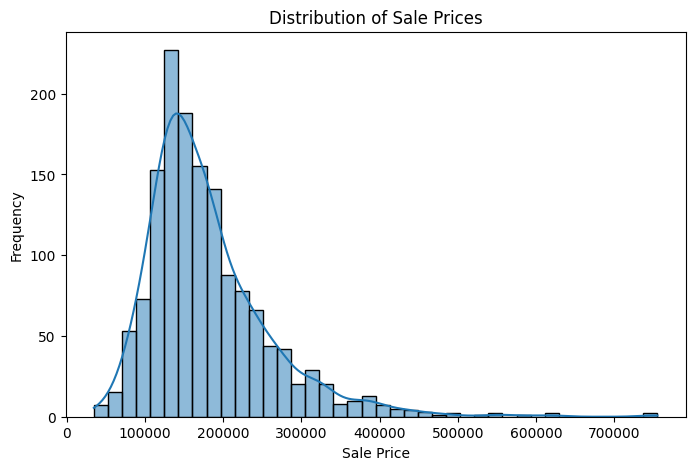

In [ ]:
#توزيع الاسعار
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


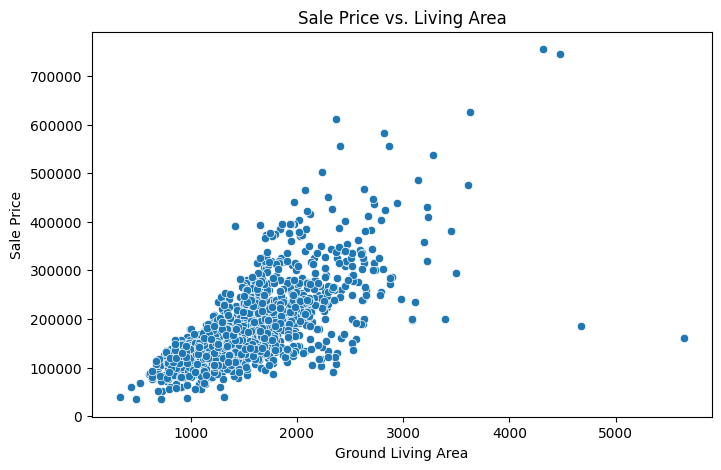

In [ ]:
#السعر مقابل المساحه
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_df)
plt.title("Sale Price vs. Living Area")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

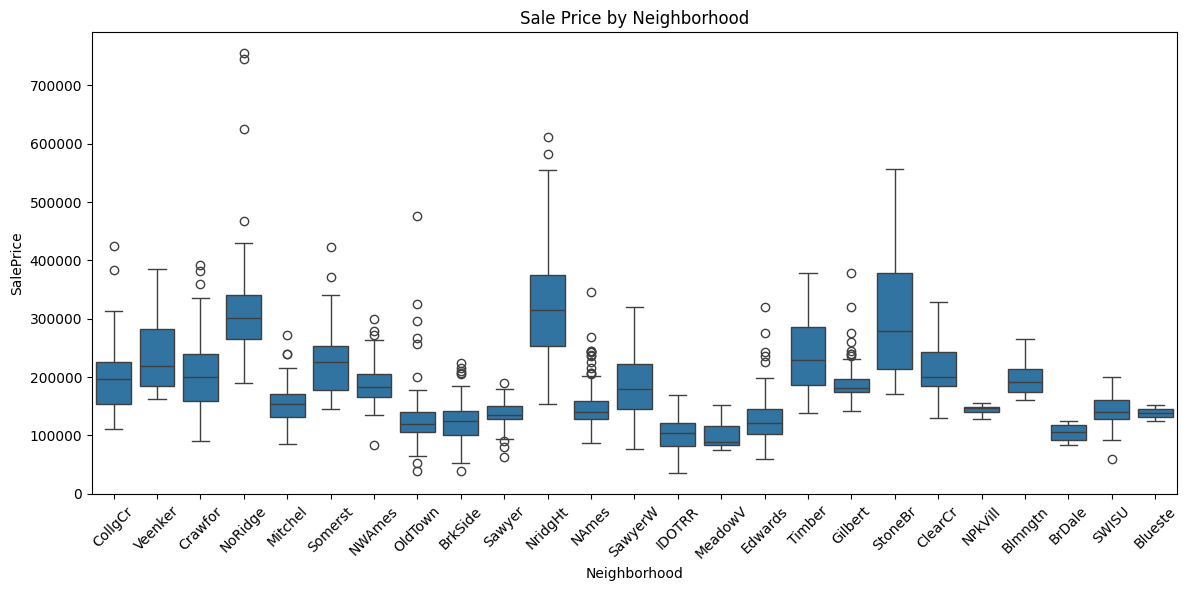

In [ ]:
#السعر حسب المكان
plt.figure(figsize=(14,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

In [ ]:
#عرض ةهmising values في كل colum
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test  = test_df.isnull().sum().sort_values(ascending=False)

print("Top missing values in Train:")
print(missing_train.head(10))
print("\nTop missing values in Test:")
print(missing_test.head(10))


Top missing values in Train:
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

Top missing values in Test:
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64


Loaded: /content/train.csv — shape: (1460, 81)

Top missing features (if any):
              missing_count  missing_percent
PoolQC                 1453            99.52
MiscFeature            1406            96.30
Alley                  1369            93.77
Fence                  1179            80.75
MasVnrType              872            59.73
FireplaceQu             690            47.26
LotFrontage             259            17.74
GarageQual               81             5.55
GarageFinish             81             5.55
GarageType               81             5.55
GarageYrBlt              81             5.55
GarageCond               81             5.55
BsmtFinType2             38             2.60
BsmtExposure             38             2.60
BsmtCond                 37             2.53
BsmtQual                 37             2.53
BsmtFinType1             37             2.53
MasVnrArea                8             0.55
Electrical                1             0.07


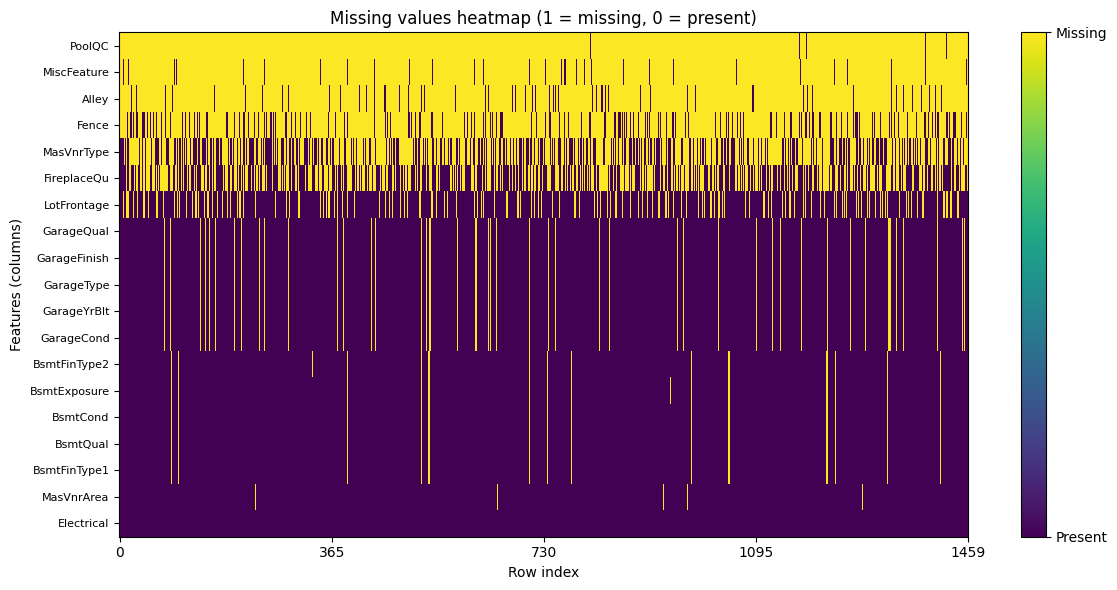

Saved missing heatmap -> /content/missing_heatmap.png


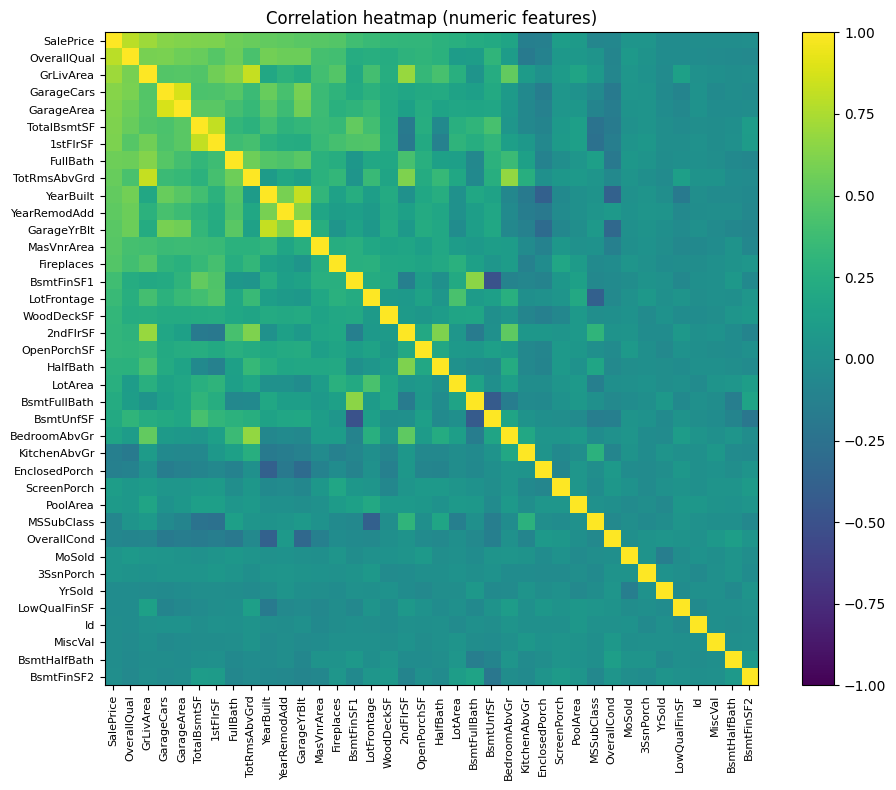

Saved correlation heatmap -> /content/corr_heatmap.png
Saved missing summary CSV -> /content/missing_summary.csv


In [ ]:
"""
Heatmaps for House Prices dataset (Google Colab)
- Missing values heatmap (shows only columns with missing > threshold by default)
- Correlation heatmap for numeric features
Saves: /content/missing_heatmap.png and /content/corr_heatmap.png
"""

import os

OUT_DIR = '/content'
os.makedirs(OUT_DIR, exist_ok=True)

TRAIN_PATHS = [
    '/content/train.csv',
    'train.csv',
    '/content/drive/MyDrive/train.csv'
]

MISSING_PERCENT_THRESHOLD = 0.0  # percent
ONLY_SHOW_COLUMNS_WITH_MISSING = True
train_path = None
for p in TRAIN_PATHS:
    if os.path.exists(p):
        train_path = p
        break

if train_path is None:
    print("upload csvى.")
    from google.colab import files
    uploaded = files.upload()  # اختر train.csv
    # move uploaded file to /content if needed
    if 'train.csv' in uploaded:
        train_path = '/content/train.csv'
    else:
        first = next(iter(uploaded.keys()))
        os.rename(first, '/content/train.csv')
        train_path = '/content/train.csv'

df = pd.read_csv(train_path)
print(f"Loaded: {train_path} — shape: {df.shape}")

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    'missing_count': missing_count.astype(int),
    'missing_percent': missing_percent
}).sort_values('missing_percent', ascending=False)

print("\nTop missing features (if any):")
print(missing_summary[missing_summary['missing_count']>0].head(20))

if ONLY_SHOW_COLUMNS_WITH_MISSING:
    cols_to_plot = missing_summary[missing_summary['missing_percent'] > MISSING_PERCENT_THRESHOLD].index.tolist()
    if len(cols_to_plot) == 0:
        print("\nNo columns exceed the missing percent threshold; plotting all columns instead.")
        cols_to_plot = df.columns.tolist()
else:
    cols_to_plot = df.columns.tolist()

missing_matrix = df[cols_to_plot].isnull().astype(int)

plt.figure(figsize=(12, max(6, len(cols_to_plot)*0.12)))
plt.imshow(missing_matrix.T, aspect='auto', interpolation='nearest')
plt.xlabel('Row index')
plt.ylabel('Features (columns)')
plt.yticks(range(len(cols_to_plot)), cols_to_plot, fontsize=8)
plt.xticks([0, len(df)//4, len(df)//2, 3*len(df)//4, len(df)-1],
           [0, len(df)//4, len(df)//2, 3*len(df)//4, len(df)-1])
plt.title('Missing values heatmap (1 = missing, 0 = present)')
cbar = plt.colorbar()
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Present','Missing'])
plt.tight_layout()

missing_heatmap_path = os.path.join(OUT_DIR, 'missing_heatmap.png')
plt.savefig(missing_heatmap_path, dpi=150)
plt.show()
print(f"Saved missing heatmap -> {missing_heatmap_path}")

numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()

if 'SalePrice' in corr.columns:
    order = corr['SalePrice'].abs().sort_values(ascending=False).index.tolist()
    corr_plot = corr.loc[order, order]
else:
    corr_plot = corr

plt.figure(figsize=(10, max(8, len(corr_plot.columns)*0.12)))
plt.imshow(corr_plot, vmin=-1, vmax=1, interpolation='nearest')
plt.xticks(range(len(corr_plot.columns)), corr_plot.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr_plot.columns)), corr_plot.columns, fontsize=8)
plt.title('Correlation heatmap (numeric features)')
cbar = plt.colorbar()
plt.tight_layout()

corr_heatmap_path = os.path.join(OUT_DIR, 'corr_heatmap.png')
plt.savefig(corr_heatmap_path, dpi=150)
plt.show()
print(f"Saved correlation heatmap -> {corr_heatmap_path}")

# Save missing summary CSV
missing_summary.to_csv(os.path.join(OUT_DIR, 'missing_summary.csv'))
print(f"Saved missing summary CSV -> {os.path.join(OUT_DIR, 'missing_summary.csv')}")


In [ ]:
import os
from IPython.display import display

POSSIBLE_PATHS = [
    '/content/work_df_preprocessed.csv',
    '/content/train.csv',
    '/mnt/data/train.csv',
    '/content/drive/MyDrive/train.csv'
]

data_path = None
for p in POSSIBLE_PATHS:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    from google.colab import files
    uploaded = files.upload()
    first = next(iter(uploaded.keys()))
    os.rename(first, '/content/' + first)
    data_path = '/content/' + first

print(f"Loading data from: {data_path}")
df = pd.read_csv(data_path)
print("Shape:", df.shape)

print("\n--- Columns (sample) ---")
display(df.columns.tolist()[:80])

print("\n--- Top 5 rows ---")
display(df.head())

print("\n--- Dtypes summary ---")
display(df.dtypes.value_counts())

print("\n--- Numeric describe (first 15 rows) ---")
display(df.select_dtypes(include=['number']).describe().T.head(15))

missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_count / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'missing_count': missing_count, 'missing_percent': missing_percent})
print("\n--- Missing values summary (top 30) ---")
display(missing_summary[missing_summary['missing_count']>0].head(30))


Loading data from: /content/train.csv
Shape: (1460, 81)

--- Columns (sample) ---


['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'


--- Top 5 rows ---


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



--- Dtypes summary ---


,count
object,43
int64,35
float64,3



--- Numeric describe (first 15 rows) ---


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0



--- Missing values summary (top 30) ---


,missing_count,missing_percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


SalePrice stats -> count: 1460  mean: 180921.2  median: 163000.0  std: 79442.5  min: 34900  max: 755000


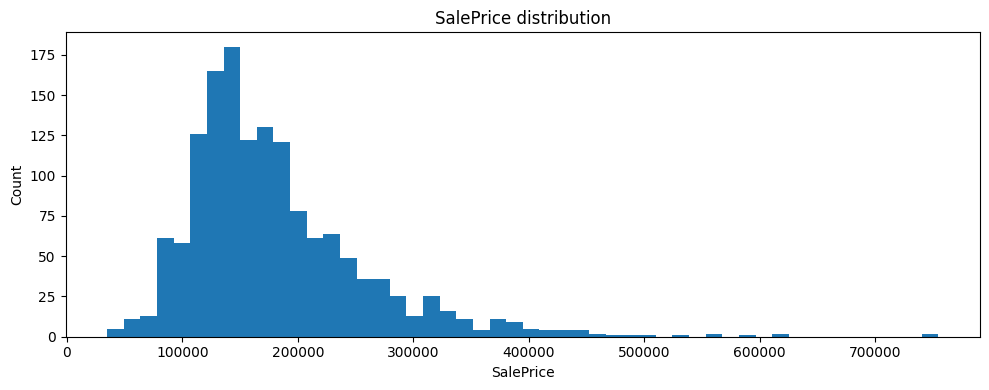

Saved: /content/hist_saleprice.png


In [ ]:
OUT_DIR = '/content'
os.makedirs(OUT_DIR, exist_ok=True)

if 'SalePrice' not in df.columns:
    print("NOT FOUND ")
else:
    sp = df['SalePrice'].dropna()
    print("SalePrice stats -> count:", sp.count(), " mean:", round(sp.mean(),2),
          " median:", round(sp.median(),2), " std:", round(sp.std(),2),
          " min:", int(sp.min()), " max:", int(sp.max()))
    plt.figure(figsize=(10,4))
    plt.hist(sp, bins=50)
    plt.xlabel('SalePrice')
    plt.ylabel('Count')
    plt.title('SalePrice distribution')
    plt.tight_layout()
    p = os.path.join(OUT_DIR, 'hist_saleprice.png')
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)



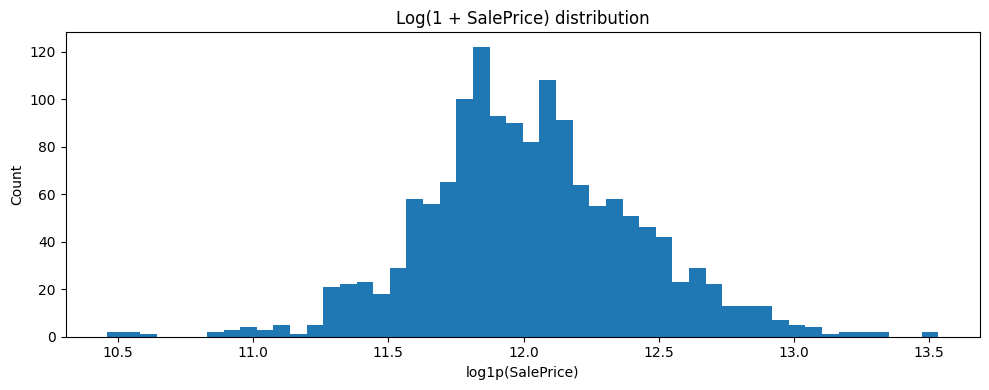

Saved: /content/hist_log_saleprice.png


In [ ]:
    plt.figure(figsize=(10,4))
    plt.hist(np.log1p(sp), bins=50)
    plt.xlabel('log1p(SalePrice)')
    plt.ylabel('Count')
    plt.title('Log(1 + SalePrice) distribution')
    plt.tight_layout()
    p = os.path.join(OUT_DIR, 'hist_log_saleprice.png')
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)

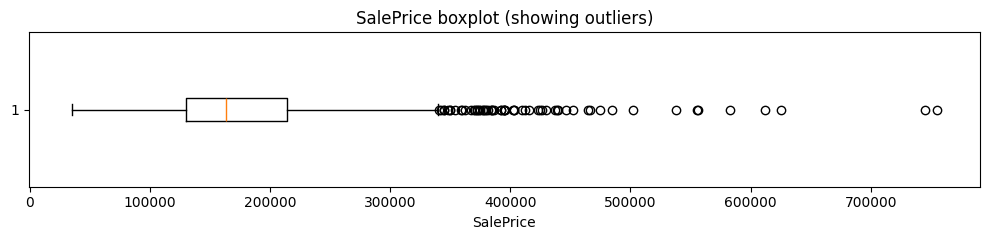

Saved: /content/boxplot_saleprice.png


In [ ]:
    plt.figure(figsize=(10,2.5))
    plt.boxplot(sp, vert=False, showfliers=True)
    plt.xlabel('SalePrice')
    plt.title('SalePrice boxplot (showing outliers)')
    plt.tight_layout()
    p = os.path.join(OUT_DIR, 'boxplot_saleprice.png')
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)


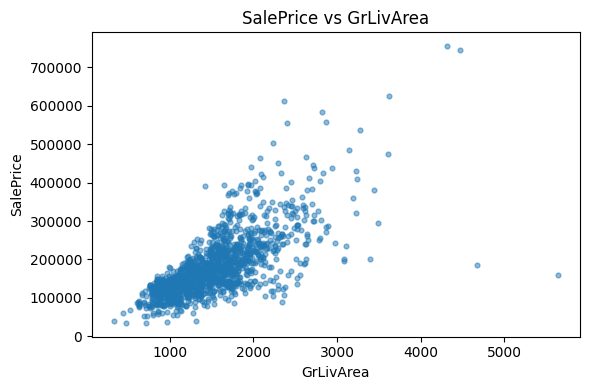

Saved: /content/scatter_GrLivArea_vs_saleprice.png


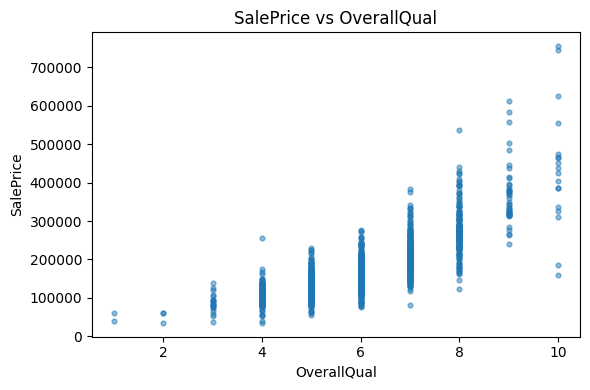

Saved: /content/scatter_OverallQual_vs_saleprice.png


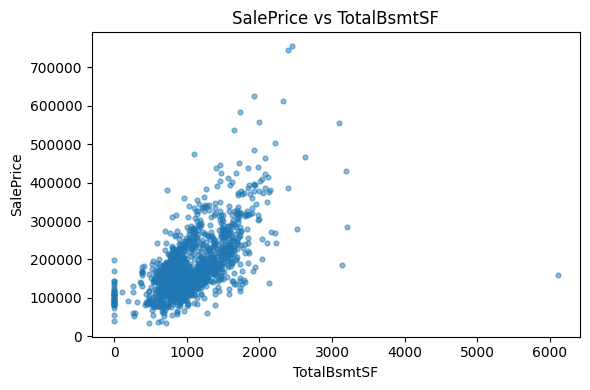

Saved: /content/scatter_TotalBsmtSF_vs_saleprice.png


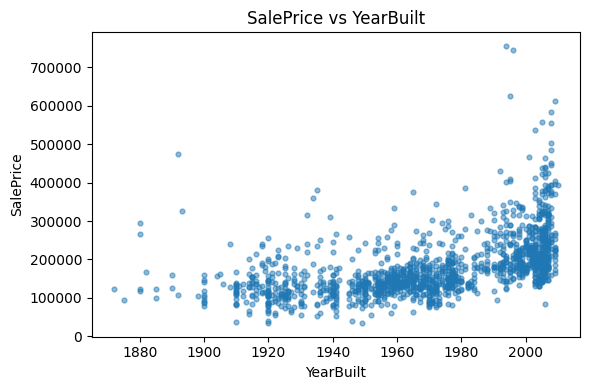

Saved: /content/scatter_YearBuilt_vs_saleprice.png


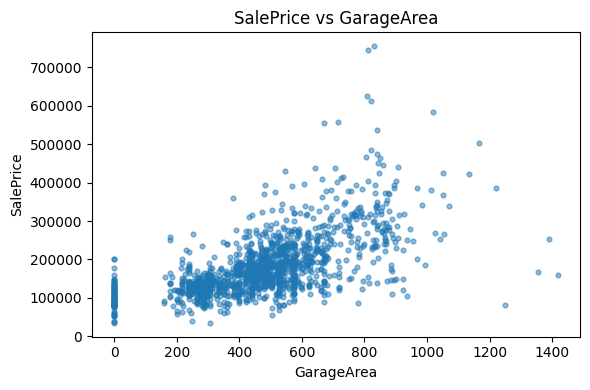

Saved: /content/scatter_GarageArea_vs_saleprice.png


In [ ]:
OUT_DIR = '/content'
os.makedirs(OUT_DIR, exist_ok=True)
priority_numeric = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'GarageArea']
for feat in priority_numeric:
    if feat in df.columns and 'SalePrice' in df.columns:
        valid = df[[feat, 'SalePrice']].dropna()
        if len(valid) == 0:
            continue
        plt.figure(figsize=(6,4))
        plt.scatter(valid[feat], valid['SalePrice'], alpha=0.5, s=12)
        plt.xlabel(feat)
        plt.ylabel('SalePrice')
        plt.title(f'SalePrice vs {feat}')
        plt.tight_layout()
        p = os.path.join(OUT_DIR, f'scatter_{feat}_vs_saleprice.png')
        plt.savefig(p, dpi=150)
        plt.show()
        print("Saved:", p)

In [ ]:
numeric = df.select_dtypes(include=[np.number])
if 'SalePrice' in numeric.columns and numeric.shape[1] > 1:
    corr_with_target = numeric.corr()['SalePrice'].sort_values(ascending=False)
    print("\nTop correlations with SalePrice:")
    display(corr_with_target.head(15))
    print("\nBottom correlations with SalePrice:")
    display(corr_with_target.tail(15))


Top correlations with SalePrice:


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897



Bottom correlations with SalePrice:


,SalePrice
BedroomAbvGr,0.168213
ScreenPorch,0.111447
PoolArea,0.092404
MoSold,0.046432
3SsnPorch,0.044584
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
Id,-0.021917
LowQualFinSF,-0.025606


/tmp/ipython-input-4027307215.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=ordered, vert=False, showfliers=False)


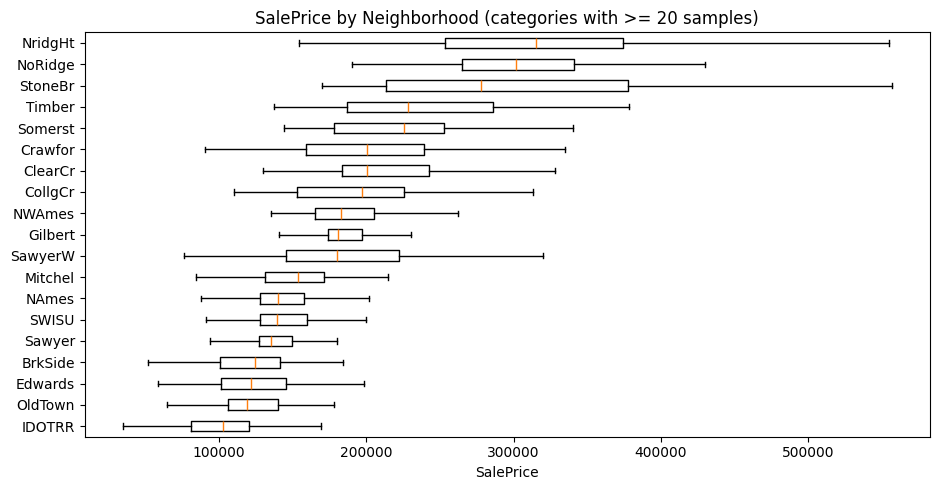

Saved: /content/boxplot_Neighborhood_saleprice.png


/tmp/ipython-input-4027307215.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=ordered, vert=False, showfliers=False)


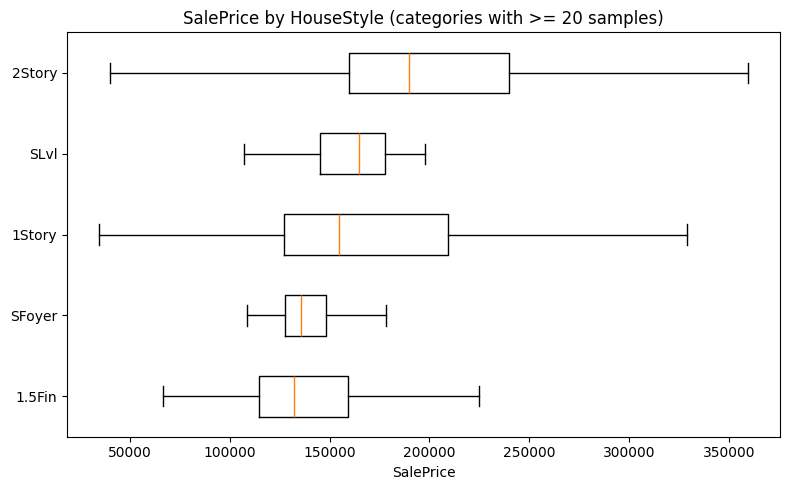

Saved: /content/boxplot_HouseStyle_saleprice.png


/tmp/ipython-input-4027307215.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=ordered, vert=False, showfliers=False)


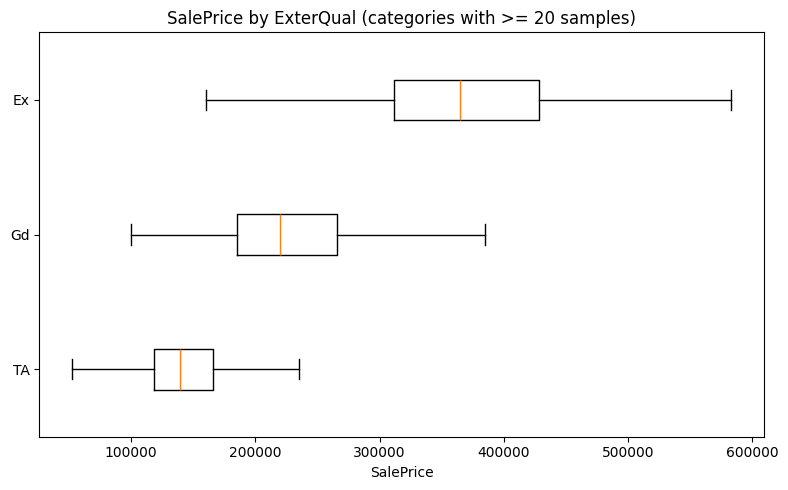

Saved: /content/boxplot_ExterQual_saleprice.png


/tmp/ipython-input-4027307215.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=ordered, vert=False, showfliers=False)


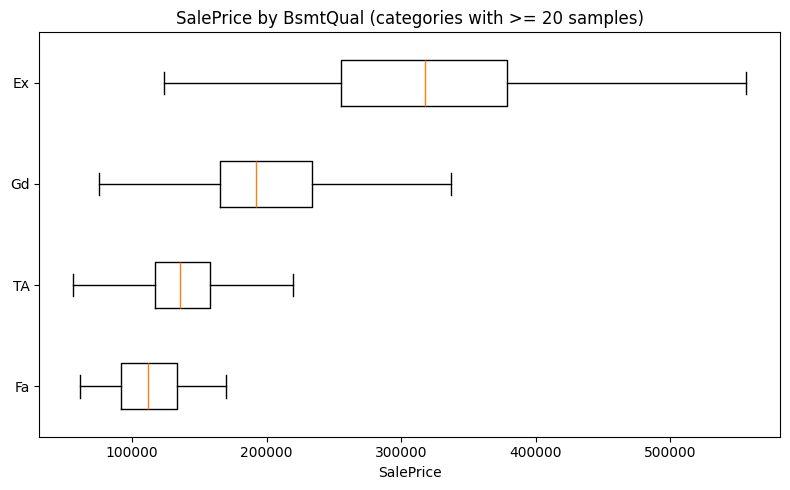

Saved: /content/boxplot_BsmtQual_saleprice.png


In [ ]:
cat_examples = ['Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual']
for cat in cat_examples:
    if cat in df.columns and 'SalePrice' in df.columns:
        counts = df[cat].value_counts()
        threshold = 20
        good_cats = counts[counts >= threshold].index.tolist()
        if len(good_cats) == 0:
            print(f"Skipping {cat}: no category with >= {threshold} samples.")
            continue
        medians = df[df[cat].isin(good_cats)].groupby(cat)['SalePrice'].median().sort_values()
        ordered = medians.index.tolist()
        data_to_plot = [df[df[cat]==c]['SalePrice'].values for c in ordered]
        plt.figure(figsize=(max(8, len(ordered)*0.5), 5))
        plt.boxplot(data_to_plot, labels=ordered, vert=False, showfliers=False)
        plt.title(f'SalePrice by {cat} (categories with >= {threshold} samples)')
        plt.xlabel('SalePrice')
        plt.tight_layout()
        p = os.path.join(OUT_DIR, f'boxplot_{cat}_saleprice.png')
        plt.savefig(p, dpi=150)
        plt.show()
        print("Saved:", p)

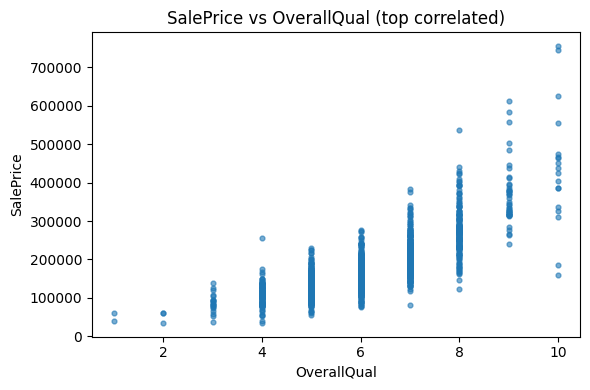

Saved: /content/scatter_topcorr_OverallQual.png


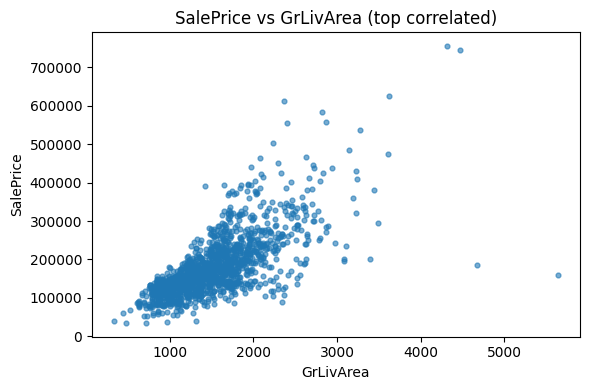

Saved: /content/scatter_topcorr_GrLivArea.png


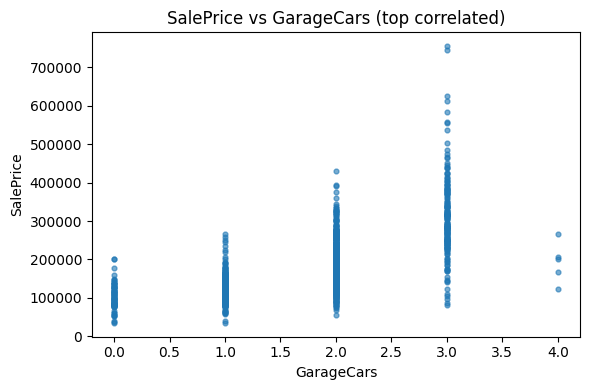

Saved: /content/scatter_topcorr_GarageCars.png


In [ ]:
if 'SalePrice' in numeric.columns:
    top_feats = corr_with_target.drop('SalePrice').abs().nlargest(3).index.tolist()
    for feat in top_feats:
        if feat in df.columns:
            valid = df[[feat, 'SalePrice']].dropna()
            if len(valid) == 0:
                continue
            plt.figure(figsize=(6,4))
            plt.scatter(valid[feat], valid['SalePrice'], alpha=0.6, s=12)
            plt.xlabel(feat)
            plt.ylabel('SalePrice')
            plt.title(f'SalePrice vs {feat} (top correlated)')
            plt.tight_layout()
            p = os.path.join(OUT_DIR, f'scatter_topcorr_{feat}.png')
            plt.savefig(p, dpi=150)
            plt.show()
            print("Saved:", p)


**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X= pd.get_dummies(train_df.drop("SalePrice", axis=1), drop_first=True)
Y= train_df["SalePrice"]

In [ ]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleC

In [ ]:
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=100)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1460, 261) (1168, 261) (292, 261)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_prediction = model.predict(X_train)

In [ ]:
model_prediction

array([218651.14293835, 246990.25634108, 149816.19205628, ...,
       321121.36409317, 108546.48273338, 278052.51630774])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))))

Mean Absolute Error: 23731.30
Mean Squared Error:6037143128.75
Root Mean Squared Error:77699.05


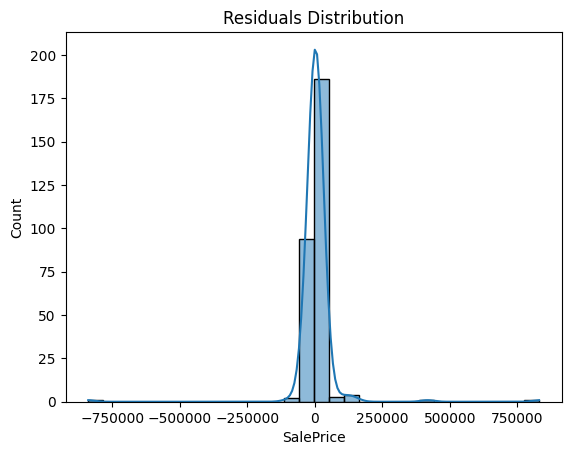

In [ ]:
residuals = Y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [ ]:
"""features_needed = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
user_house = {}
for feat in features_needed:
    val = float(input(f"Enter value for {feat}: "))
    user_house[feat] = val
price = -predict_price(user_house)
print("Predicted Price:", price)"""

'features_needed = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]\nuser_house = {}\nfor feat in features_needed:\n    val = float(input(f"Enter value for {feat}: "))\n    user_house[feat] = val\nprice = -predict_price(user_house)\nprint("Predicted Price:", price)'

In [19]:
!pip -q install xgboost


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor


try:
    from xgboost import XGBRegressor
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

RANDOM_STATE = 42


In [22]:
from google.colab import files
uploaded = files.upload()

Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques (1).zip


In [23]:
import zipfile


with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
    zip_ref.extractall("house_data")


In [24]:
import pandas as pd


data = pd.read_csv("house_data/train.csv")
print(data.shape)
data.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:

TARGET = "SalePrice"
X_raw = data.drop(columns=[TARGET])
y = data[TARGET]


num_cols = X_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_raw.select_dtypes(include=["object"]).columns.tolist()


num_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])


cat_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_cols),
        ("cat", cat_tf, cat_cols),
    ],
    remainder="drop"
)


X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (1168, 80), Test: (292, 80)


In [26]:
def evaluate_model(name, model, X_tr=X_train, X_te=X_test, y_tr=y_train, y_te=y_test, do_cv=True):

    pipe = Pipeline(steps=[("prep", preprocessor), ("model", model)])
    pipe.fit(X_tr, y_tr)


    y_pred = pipe.predict(X_te)


    rmse = mean_squared_error(y_te, y_pred, squared=False)
    mae  = mean_absolute_error(y_te, y_pred)
    r2   = r2_score(y_te, y_pred)

    print(f"=== {name} ===")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R²  : {r2:.4f}")

    if do_cv:

        cv_neg_rmse = cross_val_score(pipe, X_tr, y_tr, scoring="neg_root_mean_squared_error", cv=5)
        cv_rmse = -cv_neg_rmse
        print(f"CV RMSE (5-fold): mean={cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")

    return pipe


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=RANDOM_STATE
    ))
])


gbr.fit(X_train, y_train)
preds = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"GradientBoostingRegressor RMSE: {rmse:.4f}")


GradientBoostingRegressor RMSE: 26220.5336


In [28]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=RANDOM_STATE
    ))
])


gbr.fit(X_train, y_train)
preds = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, preds))
print(f"GradientBoostingRegressor RMSE: {rmse_gbr:.4f}")


GradientBoostingRegressor RMSE: 26220.5336


In [29]:

from xgboost import XGBRegressor

xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
print(f"XGBoost RMSE: {rmse_xgb:.4f}")


XGBoost RMSE: 24658.2906


In [30]:

from lightgbm import LGBMRegressor

lgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

lgb.fit(X_train, y_train)
preds = lgb.predict(X_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, preds))
print(f"LightGBM RMSE: {rmse_lgb:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3443
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 179
[LightGBM] [Info] Start training from score 181441.541952
LightGBM RMSE: 29326.0943


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [31]:

results = {
    "GradientBoostingRegressor": rmse_gbr,
    "XGBoost": rmse_xgb,
    "LightGBM": rmse_lgb
}

print("\n📊 RMSE Comparison:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")



📊 RMSE Comparison:
GradientBoostingRegressor: 26220.5336
XGBoost: 24658.2906
LightGBM: 29326.0943


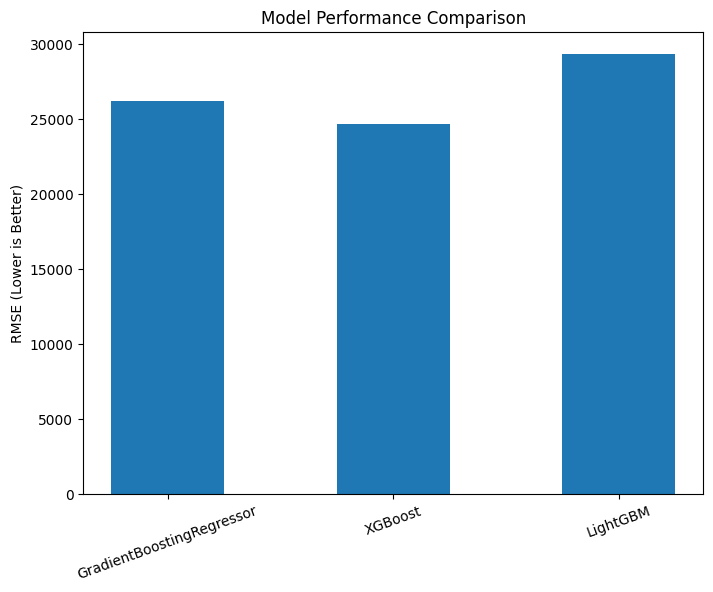

In [ ]:

import matplotlib.pyplot as plt

models = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(8,6))
plt.bar(models, scores, width=0.5)
plt.ylabel("RMSE (Lower is Better)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=20)
plt.show()
